<a href="https://colab.research.google.com/github/MachsunSSR/DataMining-SemPendek-2021/blob/master/Data_Mining_3_KNN_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import Library

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#Pembuatan Dataframe

In [ ]:
gender = np.array(['M', 'M',  'M', 'M', 'F', 'F',  
                   'F', 'M',  'M', 'M', 'F', 'F', 'F', 'F',])

car_type = np.array(["Family", "Sports",  "Sports", "Sports", "Sports", "Sports", "Luxury", 
                     "Family",  "Family", "Luxury", "Luxury", "Luxury", "Luxury",  "Luxury"])

shirt_size = np.array(["Small", "Medium", "Large",  "Extra Large", "Small", "Small", "Large", 
                       "Large",  "Medium", "Extra Large", "Small", "Medium", "Medium",  "Large"])

Class = np.array(['C0', 'C0', 'C0',  'C0', 'C0', 'C0', 'C0',
                  "C1", "C1", "C1", "C1", "C1", "C1",  "C1"])

gender2 = np.array(['M',  'M',  'F', 
                    'M',  'F', 'F',])

car_type2 = np.array(["Sports","Sports", "Sports",
                      "Family", "Luxury","Luxury"])

shirt_size2 = np.array(["Medium","Extra Large","Medium",
                        "Extra Large","Small", "Medium"])

Class2 = np.array(['C0', 'C0','C0', 
                   "C1","C1", "C1"])

In [ ]:
df_train = pd.DataFrame()
df_train["Gender"] = gender
df_train["Car Type"]= car_type
df_train["Shirt Size"] = shirt_size
df_train["Class"] = Class

df_test = pd.DataFrame()
df_test["Gender"] = gender2
df_test["Car Type"]= car_type2
df_test["Shirt Size"] = shirt_size2
df_test["Class"] = Class2

##Hasil Dataframe

In [ ]:
df_train

,Gender,Car Type,Shirt Size,Class
0,M,Family,Small,C0
1,M,Sports,Medium,C0
2,M,Sports,Large,C0
3,M,Sports,Extra Large,C0
4,F,Sports,Small,C0
5,F,Sports,Small,C0
6,F,Luxury,Large,C0
7,M,Family,Large,C1
8,M,Family,Medium,C1
9,M,Luxury,Extra Large,C1


In [ ]:
df_test

,Gender,Car Type,Shirt Size,Class
0,M,Sports,Medium,C0
1,M,Sports,Extra Large,C0
2,F,Sports,Medium,C0
3,M,Family,Extra Large,C1
4,F,Luxury,Small,C1
5,F,Luxury,Medium,C1


#Preprocessing

###Mengubah data ordinal menjadi bentuk angka

In [ ]:
# Mengubah bilangan ordinal menjadi range 1 - 4
df_train["Shirt Size"].replace({"Small": 1, "Medium": 2, "Large": 3, "Extra Large": 4}, inplace=True)
df_test["Shirt Size"].replace({"Small": 1, "Medium": 2, "Large": 3, "Extra Large": 4}, inplace=True)

In [ ]:
# mengatur ulang data ordinal
def zif(rif, mif):
    return round((rif - 1)/(mif - 1), 2)

def mutateOrdinal(df):
  shirt_size_value = df["Shirt Size"].values
  mif = 4
  res = [zif(i, mif) for i in shirt_size_value]
  return res

df_test["Shirt Size"] = mutateOrdinal(df_test)
df_train["Shirt Size"] = mutateOrdinal(df_train)


In [ ]:
df_test

,Gender,Car Type,Shirt Size,Class
0,M,Sports,0.33,C0
1,M,Sports,1.00,C0
2,F,Sports,0.33,C0
3,M,Family,1.00,C1
4,F,Luxury,0.00,C1
5,F,Luxury,0.33,C1


In [ ]:
df_train

,Gender,Car Type,Shirt Size,Class
0,M,Family,0.00,C0
1,M,Sports,0.33,C0
2,M,Sports,0.67,C0
3,M,Sports,1.00,C0
4,F,Sports,0.00,C0
5,F,Sports,0.00,C0
6,F,Luxury,0.67,C0
7,M,Family,0.67,C1
8,M,Family,0.33,C1
9,M,Luxury,1.00,C1


###Mengubah data kategorikal menjadi numerik menggunakan One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df_train = pd.DataFrame(enc.fit_transform(df_train[['Gender', 'Car Type']]).toarray())
enc_df_test = pd.DataFrame(enc.transform(df_test[['Gender', 'Car Type']]).toarray())

In [ ]:
enc_df_test

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0


###Membuat data X Y train test

In [ ]:
#Data train
X_train = df_train["Shirt Size"].to_frame().join(enc_df_train)
y_train = df_train["Class"]

#Data test
X_test = df_test["Shirt Size"].to_frame().join(enc_df_test)
y_test = df_test["Class"]

##Training Model & Predicting

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

predicted = model.predict(X_test)
print(predicted)
print(np.array(y_test))

['C0' 'C0' 'C0' 'C1' 'C1' 'C1']
['C0' 'C0' 'C0' 'C1' 'C1' 'C1']


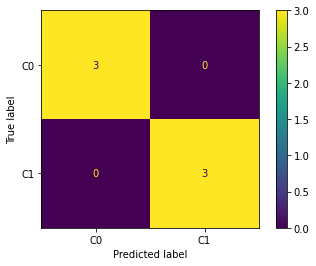

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predicted)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

          C0       1.00      1.00      1.00         3
          C1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
X = X_train.append(X_test)
y = y_train.append(y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5  1.   0.5  0.75 1.  ]
cv_scores mean:0.75
